# MTA Exploratory Data Analysis


In this project i will try to find the top 5 crowded stations and find the weekdays that have more traffic

# Libraries

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as tick
#from matplotlib import mlab

# Initialise the number of weeks for the dataset, four months = 16 weeks

In [2]:
num_weeks = 16

#initialise the date for the first week of the dataset (week ending on start_date)
start_date = filedate = pd.Timestamp('2019-12-28 00:00:00')

#initialise the regex for the MTA turnstile url
filename_regex = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"

filelist = []

for numfiles in range (num_weeks):

    # create the appropriate filename for the week
    filedate_str = str(filedate.year)[2:4] + str(filedate.month).zfill(2) + str(filedate.day).zfill(2)
    filename = filename_regex.format(filedate_str)

    # read the file and append it to the list of files to be concacated
    df = pd.read_csv(filename)#, parse_dates=[['DATE','TIME']], keep_date_col=True)
    filelist.append(df)

    # advance to the next week
    filedate += pd.Timedelta(days=7)

mta= pd.concat(filelist, axis=0, ignore_index=True)

In [3]:
mta.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/21/2019,03:00:00,REGULAR,7318040,2480587
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/21/2019,07:00:00,REGULAR,7318049,2480598
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/21/2019,11:00:00,RECOVR AUD,7318101,2480680
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/21/2019,15:00:00,REGULAR,7318263,2480763
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/21/2019,19:00:00,REGULAR,7318559,2480823


In [4]:
mta.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

# Remove space

In [5]:
mta.rename(columns={'EXITS                                                               ':'EXITS'}, inplace=True)

In [6]:
mta.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [7]:
mta.dtypes

C/A         object
UNIT        object
SCP         object
STATION     object
LINENAME    object
DIVISION    object
DATE        object
TIME        object
DESC        object
ENTRIES      int64
EXITS        int64
dtype: object

# Change data types of date and time to datetime

In [8]:
mta["DATE"] = pd.to_datetime(mta.DATE)
mta["TIME"] = pd.to_datetime(mta.TIME)

In [182]:
# Take the date and time fields into a single datetime column
#mta["DATE_TIME"] = pd.to_datetime(mta.DATE + " " + mta.TIME, format="%m/%d/%Y %H:%M:%S")

In [9]:
mta.dtypes

C/A                 object
UNIT                object
SCP                 object
STATION             object
LINENAME            object
DIVISION            object
DATE        datetime64[ns]
TIME        datetime64[ns]
DESC                object
ENTRIES              int64
EXITS                int64
dtype: object

In [10]:
mta.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-12-21,2021-09-08 03:00:00,REGULAR,7318040,2480587
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-12-21,2021-09-08 07:00:00,REGULAR,7318049,2480598
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-12-21,2021-09-08 11:00:00,RECOVR AUD,7318101,2480680
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-12-21,2021-09-08 15:00:00,REGULAR,7318263,2480763
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-12-21,2021-09-08 19:00:00,REGULAR,7318559,2480823


# Check for duplicated rows and remove them

In [12]:
(mta
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE","TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES
2964526,R514,R094,00-05-00,ASTORIA BLVD,2020-01-18,2021-09-08 11:00:00,2
519925,H009,R235,00-03-00,BEDFORD AV,2020-03-22,2021-09-08 12:00:00,2
2964546,R514,R094,00-05-00,ASTORIA BLVD,2020-01-21,2021-09-08 19:00:00,2
2964547,R514,R094,00-05-00,ASTORIA BLVD,2020-01-21,2021-09-08 23:00:00,2
2964548,R514,R094,00-05-00,ASTORIA BLVD,2020-01-22,2021-09-08 03:00:00,2


In [13]:
mask = mta["DESC"] == "REGULAR"
mta = mta[mask]

mta.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-12-21,2021-09-08 03:00:00,REGULAR,7318040,2480587
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-12-21,2021-09-08 07:00:00,REGULAR,7318049,2480598
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-12-21,2021-09-08 15:00:00,REGULAR,7318263,2480763
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-12-21,2021-09-08 19:00:00,REGULAR,7318559,2480823
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-12-21,2021-09-08 23:00:00,REGULAR,7318742,2480852


# Check there are not duplicated rows

In [217]:
(mta
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2019-11-30 03:00:00,1
1640031,R138,R293,00-06-00,34 ST-PENN STA,2020-02-06 17:00:00,1
1640033,R138,R293,00-06-00,34 ST-PENN STA,2020-02-07 01:00:00,1
1640034,R138,R293,00-06-00,34 ST-PENN STA,2020-02-07 05:00:00,1
1640035,R138,R293,00-06-00,34 ST-PENN STA,2020-02-07 09:00:00,1


# Get the number of entries and exits

In [218]:
mta_entries = mta.groupby(['STATION','C/A','UNIT','SCP','DATE']).ENTRIES.max() - mta.groupby(['STATION','C/A','UNIT','SCP','DATE']).ENTRIES.min()
mta_exits = mta.groupby(['STATION','C/A','UNIT','SCP','DATE']).EXITS.max() - mta.groupby(['STATION','C/A','UNIT','SCP','DATE']).EXITS.min()
#flattens the data
mta_entries_flat = mta_entries.reset_index()
mta_exits_flat = mta_exits.reset_index()

# Merge entries and exits


In [220]:
mta_entries_exits = pd.merge(mta_entries_flat, mta_exits_flat, how='outer')

In [232]:
mta_entries_exits= mta_entries_exits[mta_entries_exits['ENTRIES'] != 0]
mta_entries_exits

,STATION,C/A,UNIT,SCP,DATE,ENTRIES,EXITS,WEEKDAY,TRAFFIC,WEEKDAY_INDEX
0,1 AV,H007,R248,00-00-00,2019-11-30,1309,2892,Saturday,4201,5
1,1 AV,H007,R248,00-00-00,2019-12-01,930,2397,Sunday,3327,6
2,1 AV,H007,R248,00-00-00,2019-12-02,3459,3491,Monday,6950,0
3,1 AV,H007,R248,00-00-00,2019-12-03,3987,3632,Tuesday,7619,1
4,1 AV,H007,R248,00-00-00,2019-12-04,5377,3194,Wednesday,8571,2
...,...,...,...,...,...,...,...,...,...,...
411193,ZEREGA AV,R419,R326,00-05-00,2020-01-02,3,0,Thursday,3,3
411205,ZEREGA AV,R419,R326,00-05-00,2020-01-14,1,0,Tuesday,1,1
411208,ZEREGA AV,R419,R326,00-05-00,2020-01-17,1,0,Friday,1,4
411225,ZEREGA AV,R419,R326,00-05-00,2020-02-03,2,0,Monday,2,0


In [ ]:
mta_entries_exits[(mta_entries_exits["mta_entries_exits"] < 0)]

# Add weekday, traffic and weekday index columns to dataset

In [233]:
mta_entries_exits['WEEKDAY'] = mta_entries_exits['DATE'].dt.day_name()
mta_entries_exits['TRAFFIC'] = mta_entries_exits['ENTRIES'] + mta_entries_exits['EXITS']
mta_entries_exits['WEEKDAY_INDEX'] = mta_entries_exits['DATE'].dt.weekday

In [234]:
mta_entries_exits

,STATION,C/A,UNIT,SCP,DATE,ENTRIES,EXITS,WEEKDAY,TRAFFIC,WEEKDAY_INDEX
0,1 AV,H007,R248,00-00-00,2019-11-30,1309,2892,Saturday,4201,5
1,1 AV,H007,R248,00-00-00,2019-12-01,930,2397,Sunday,3327,6
2,1 AV,H007,R248,00-00-00,2019-12-02,3459,3491,Monday,6950,0
3,1 AV,H007,R248,00-00-00,2019-12-03,3987,3632,Tuesday,7619,1
4,1 AV,H007,R248,00-00-00,2019-12-04,5377,3194,Wednesday,8571,2
...,...,...,...,...,...,...,...,...,...,...
411193,ZEREGA AV,R419,R326,00-05-00,2020-01-02,3,0,Thursday,3,3
411205,ZEREGA AV,R419,R326,00-05-00,2020-01-14,1,0,Tuesday,1,1
411208,ZEREGA AV,R419,R326,00-05-00,2020-01-17,1,0,Friday,1,4
411225,ZEREGA AV,R419,R326,00-05-00,2020-02-03,2,0,Monday,2,0


# Group by stations

In [235]:
mta_bystation = mta_entries_exits.groupby(['STATION','DATE','WEEKDAY', 'WEEKDAY_INDEX']).sum().reset_index()

In [236]:
mta_bystation

,STATION,DATE,WEEKDAY,WEEKDAY_INDEX,ENTRIES,EXITS,TRAFFIC
0,1 AV,2019-11-30,Saturday,5,4614,6101,10715
1,1 AV,2019-12-01,Sunday,6,3414,4768,8182
2,1 AV,2019-12-02,Monday,0,16083,18844,34927
3,1 AV,2019-12-03,Tuesday,1,17799,19780,37579
4,1 AV,2019-12-04,Wednesday,2,18006,19906,37912
...,...,...,...,...,...,...,...
31557,ZEREGA AV,2020-02-17,Monday,0,1438,1227,2665
31558,ZEREGA AV,2020-02-18,Tuesday,1,2367,2006,4373
31559,ZEREGA AV,2020-02-19,Wednesday,2,2447,2137,4584
31560,ZEREGA AV,2020-02-20,Thursday,3,2500,2065,4565


# Check for top 5 stations by turnstile traffic

In [237]:
mta_top5 = mta_bystation.groupby('STATION').sum().reset_index().sort_values('TRAFFIC', ascending=False).head(5)
mta_top5

,STATION,WEEKDAY_INDEX,ENTRIES,EXITS,TRAFFIC
59,34 ST-HERALD SQ,252,2518146036,4115766969,6633913005
55,3 AV-149 ST,252,3658555852,2895647036,6554202888
236,GUN HILL RD,252,1889065168,1604930600,3493995768
119,ALLERTON AV,252,2047070821,906155132,2953225953
254,JAY ST-METROTEC,252,1251469318,1398191400,2649660718


# Plot traffic by stations

[Text(0.5, 1.0, 'Top 5 Stations by Traffic'),
 Text(0.5, 0, 'Stations'),
 Text(0, 0.5, 'Traffic in millions')]

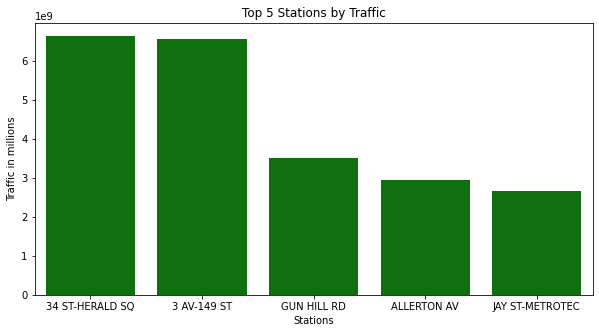

In [238]:
fig = plt.figure(figsize=(10,5))
sns.barplot(data=mta_top5, x = 'STATION', y = 'TRAFFIC', color='green').set(title='Top 5 Stations by Traffic', xlabel='Stations', ylabel='Traffic in millions')

# Plot traffic by week days

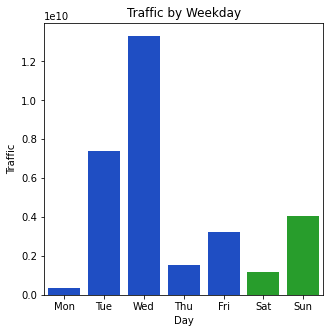

In [240]:
fig, axs = plt.subplots(nrows=1,figsize=(5,5))

with sns.xkcd_palette(['blue', 'blue', 'blue', 'blue', 'blue', 'green', 'green']):
    sns.barplot(data = mta_bystation.groupby('WEEKDAY_INDEX').sum().reset_index(), x='WEEKDAY_INDEX', y='TRAFFIC', ax=axs, label="Traffic").set(title='Traffic by Weekday', xticklabels=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], xlabel='Day', ylabel='Traffic');

axs = plt.gca()

the data looks weird since the weekdays has very different traffic that doesn’t make sence. i will try to clean the data and solve it to make it more reliable 